Training set size: (79983, 4)
Testing set size: (19996, 4)


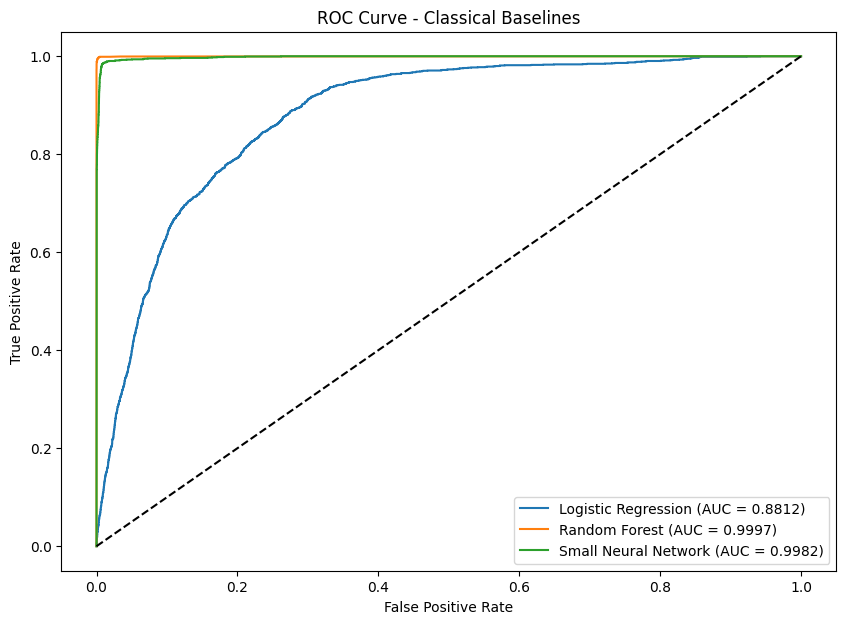


--- Benchmark AUC-ROC Scores ---
Logistic Regression: 0.8812
Random Forest: 0.9997
Small Neural Network: 0.9982


In [1]:
# %% [markdown]
# # Classical Baseline Models
# This notebook establishes the benchmark performance using classical Machine Learning 
# algorithms on the reduced 4-feature dataset.

# %%
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Add src to path to import our processing script
sys.path.append(os.path.abspath('../src'))
from data_processing import process_fraud_data

# %%
# 1. Load and Preprocess Data
X_train, X_test, y_train, y_test, pca = process_fraud_data('../data/dataset.csv')

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# %%
# 2. Define and Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Small Neural Network": MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000, random_state=42)
}

results = {}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict probabilities for AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    results[name] = auc
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# %%
# 3. Visualizing Results
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Classical Baselines')
plt.legend()
plt.show()

print("\n--- Benchmark AUC-ROC Scores ---")
for name, score in results.items():
    print(f"{name}: {score:.4f}")